In [5]:
# 데이터 불러오기 
import pandas as pd
all = pd.read_excel("./xlsx/Join_data.xlsx", index_col = 0)              # index_col = 0 파일 읽어올 떄 "Unnamed: 0" 컬럼이 추가돼서 해당 컬럼 제거

# 컬럼 추출
all2 = all[['DateTime', '종가_ex', '1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs', '5Y_Mid_irs', '10Y_Mid_irs', '1Y_Mid_crs',
       '2Y_Mid_crs', '3Y_Mid_crs', '5Y_Mid_crs', '10Y_Mid_crs', '국고1년', '국고3년', '국고5년',
       '국고10년', '통안364일', '통안2년', 'Mid_ndf',
       '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스', 'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

# 0값 삭제
index2 = all2[all2["통안364일"] == 0].index
all2.drop(index2, inplace=True)
all2.reset_index(drop=True, inplace=True)

# 대비 계산
all2['대비_irs1년'] = all2['1Y_Mid_irs']-all2['1Y_Mid_irs'].shift(1)
all2['대비_irs2년'] = all2['2Y_Mid_irs']-all2['2Y_Mid_irs'].shift(1)
all2['대비_irs3년'] = all2['3Y_Mid_irs']-all2['3Y_Mid_irs'].shift(1)
all2['대비_irs5년'] = all2['5Y_Mid_irs']-all2['5Y_Mid_irs'].shift(1)
all2['대비_irs10년'] = all2['10Y_Mid_irs']-all2['10Y_Mid_irs'].shift(1)

all2['대비_crs1년'] = all2['1Y_Mid_crs']-all2['1Y_Mid_crs'].shift(1)
all2['대비_crs2년'] = all2['2Y_Mid_crs']-all2['2Y_Mid_crs'].shift(1)
all2['대비_crs3년'] = all2['3Y_Mid_crs']-all2['3Y_Mid_crs'].shift(1)
all2['대비_crs5년'] = all2['5Y_Mid_crs']-all2['5Y_Mid_crs'].shift(1)
all2['대비_crs10년'] = all2['10Y_Mid_crs']-all2['10Y_Mid_crs'].shift(1)

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)

all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)

all2['대비_베이시스1년'] = all2['1Y_베이시스']-all2['1Y_베이시스'].shift(1)
all2['대비_베이시스2년'] = all2['2Y_베이시스']-all2['2Y_베이시스'].shift(1)
all2['대비_베이시스3년'] = all2['3Y_베이시스']-all2['3Y_베이시스'].shift(1)
all2['대비_베이시스5년'] =all2['5Y_베이시스']-all2['5Y_베이시스'].shift(1)
all2['대비_베이시스10년'] = all2['10Y_베이시스']-all2['10Y_베이시스'].shift(1)

all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)

all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 

# 전일종가 계산
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

# Nan 행 지우고 인덱스 초기화
all2.drop([0], axis=0, inplace=True)
all2.reset_index(drop=True, inplace=True)

# 필요 칼럼만 남기기
all3 = all2.copy()
all3 = all2[["DateTime", "종가_ex", "전일종가_ex", '대비_irs1년', '대비_irs2년', '대비_irs3년', '대비_irs5년', '대비_irs10  년', "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", 
"대비_통안1년", "대비_통안2년", "대비_베이시스1년", "대비_베이시스2년", "대비_베이시스3년", "대비_베이시스5년","대비_베이시스10년","대비_ndf", "스왑포인트_1월물"]]

# DateTime을 인덱스로 바꿔주기
df = all3.set_index('DateTime')
df.head(2)

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\3451898880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all2.drop(index2, inplace=True)
C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\3451898880.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\3451898880.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,종가_ex,전일종가_ex,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_베이시스1년,대비_베이시스2년,대비_베이시스3년,대비_베이시스5년,대비_베이시스10년,대비_ndf,스왑포인트_1월물
DateTime,,,,,,,,,,,,,,,
2012-08-02,1131.7,1126.5,-0.03,-0.04,-0.04,-0.04,-0.03,-0.03,2.0,8.0,9.0,9.0,9.0,1.75,2.5
2012-08-03,1134.8,1131.7,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,2.0,1.5,1.0,-5.0,-13.0,4.00,2.4


In [34]:
df.columns

Index(['종가_ex', '전일종가_ex', '대비_국고1년', '대비_국고3년', '대비_국고5년', '대비_국고10년',
       '대비_통안1년', '대비_통안2년', '대비_베이시스1년', '대비_베이시스2년', '대비_베이시스3년',
       '대비_베이시스5년', '대비_베이시스10년', '대비_ndf', '스왑포인트_1월물'],
      dtype='object')

In [72]:
df_Data = df[['대비_국고1년', '대비_국고3년', '대비_국고5년', '대비_국고10년',
       '대비_통안1년', '대비_통안2년', '대비_베이시스1년', '대비_베이시스2년', '대비_베이시스3년',
       '대비_베이시스5년', '대비_베이시스10년', '대비_ndf', '스왑포인트_1월물']]
df_Data.feature= df_Data.columns
df_Data.feature       


C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\2906188349.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_Data.feature= df_Data.columns


Index(['대비_국고1년', '대비_국고3년', '대비_국고5년', '대비_국고10년', '대비_통안1년', '대비_통안2년',
       '대비_베이시스1년', '대비_베이시스2년', '대비_베이시스3년', '대비_베이시스5년', '대비_베이시스10년',
       '대비_ndf', '스왑포인트_1월물'],
      dtype='object')

In [79]:
# 스케일링 코드
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_Data)
df_Data_scaled= scaler.transform(df_Data)
df_scaled = pd.DataFrame (data = df_Data_scaled, columns=df_Data.feature)
df_scaled

,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_베이시스1년,대비_베이시스2년,대비_베이시스3년,대비_베이시스5년,대비_베이시스10년,대비_ndf,스왑포인트_1월물
0,-1.696899,-0.646125,-1.078965,-1.026816,-0.779107,-0.779107,0.348408,1.542408,1.436255,1.625656,1.486549,0.079092,1.907480
1,-1.131880,-0.323621,-1.888848,-1.797084,-0.520108,-0.520108,0.348408,0.286516,0.156891,-0.909165,-2.155727,0.184805,1.816994
2,0.563178,0.160136,0.000880,0.000209,0.256889,0.256889,-0.350615,-0.872769,-0.802631,-1.090224,-0.831263,-0.449473,1.816994
3,-0.566861,-0.001117,0.000880,0.000209,-0.261109,-0.261109,0.173652,0.286516,-0.003029,-1.452341,-1.659053,0.020363,1.907480
4,-0.566861,-0.323621,-0.539042,-0.513303,-0.261109,-0.261109,-0.001103,-0.389734,-0.322870,-0.728107,-1.162379,0.055600,1.816994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,-1.131880,-0.968630,-1.888848,-2.310597,-0.261109,-0.261109,-0.700126,-0.196520,-0.003029,-0.365989,-0.003473,0.154266,-0.897605
2451,0.563178,-0.484873,-0.539042,-0.770059,0.256889,0.256889,0.348408,-0.196520,-0.003029,0.177187,0.162085,0.050902,-0.988092
2452,-0.001841,-0.484873,-1.348926,-1.540328,0.515888,0.515888,0.348408,0.769551,0.796573,0.901421,0.824317,-0.026621,-0.852362
2453,0.563178,0.643892,0.810763,2.054259,0.515888,0.515888,0.173652,-0.003305,-0.162949,-0.365989,-0.831263,-0.214555,-0.942849


In [85]:
import numpy as np
from scipy.stats import shapiro
# from scipy import stats

In [114]:
df_scaled["대비_국고1년"]

0      -1.696899
1      -1.131880
2       0.563178
3      -0.566861
4      -0.566861
          ...   
2450   -1.131880
2451    0.563178
2452   -0.001841
2453    0.563178
2454   -2.261919
Name: 대비_국고1년, Length: 2455, dtype: float64

In [115]:
shapiro(df_scaled["대비_국고1년"])

ShapiroResult(statistic=0.8191521763801575, pvalue=0.0)

c:\Users\hyeok\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hyeok\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyeok\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hyeok\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from c

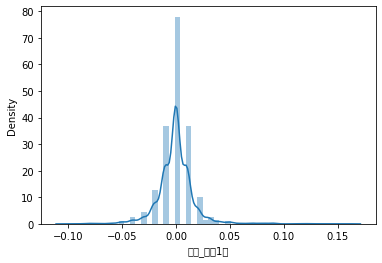

In [123]:
import seaborn as sns

sns.distplot(df["대비_국고1년"])
plt.show()

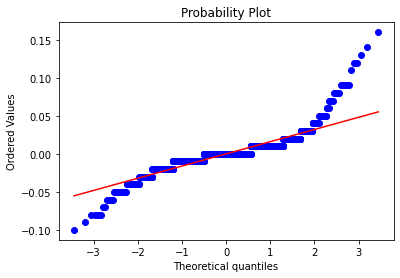

In [122]:
import matplotlib.pyplot as plt
from scipy import stats

stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
plt.show()

In [109]:
df_국고1년 = df[['대비_국고1년']]
df_국고1년.feature= df_국고1년.columns

scaler = StandardScaler()

df_국고1년_scaler= scaler.fit_transform(df_국고1년)
df_국고1년_scaled = pd.DataFrame (data = df_국고1년_scaler, columns=df_국고1년.feature)

shapiro_test = shapiro(df_국고1년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\292834066.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_국고1년.feature= df_국고1년.columns


ShapiroResult(statistic=0.8191521763801575, pvalue=0.0)

In [125]:
df_국고3년 = df[['대비_국고3년']]
df_국고3년.feature= df_국고1년.columns

scaler = StandardScaler()

df_국고3년_scaler= scaler.fit_transform(df_국고3년)
df_국고3년_scaled = pd.DataFrame (data = df_국고3년_scaler, columns=df_국고3년.feature)

shapiro_test = shapiro(df_국고3년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\494144842.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_국고3년.feature= df_국고1년.columns


ShapiroResult(statistic=0.3311117887496948, pvalue=0.0)

In [90]:
df_국고5년 = df[['대비_국고5년']]
df_국고5년.feature = df_국고5년.columns

scaler = StandardScaler()

scaler.fit(df_국고5년)
df_국고5년_scaler = scaler.transform(df_국고5년)
df_국고5년_scaled = pd.DataFrame (data = df_국고5년_scaler, columns=df_국고5년.feature)

shapiro_test = stats.shapiro(df_국고5년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\1321263489.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_국고5년.feature= df_국고5년.columns


ShapiroResult(statistic=0.9404698610305786, pvalue=2.447022264287545e-30)

In [92]:
df_국고10년 = df[['대비_국고10년']]
df_국고10년.feature= df_국고10년.columns

scaler = StandardScaler()

scaler.fit(df_국고10년)
df_국고10년_scaler = scaler.transform(df_국고10년)
df_국고10년_scaled = pd.DataFrame (data = df_국고10년_scaler, columns=df_국고10년.feature)

shapiro_test = stats.shapiro(df_국고10년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\1115839231.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_국고10년.feature= df_국고10년.columns


ShapiroResult(statistic=0.8823281526565552, pvalue=1.072441740717069e-39)

In [93]:
df_통안1년 = df[['대비_통안1년']]
df_통안1년.feature= df_통안1년.columns

scaler = StandardScaler()

scaler.fit(df_통안1년)
df_통안1년_scaler = scaler.transform(df_통안1년)
df_통안1년_scaled = pd.DataFrame (data = df_통안1년_scaler, columns=df_통안1년.feature)

shapiro_test = stats.shapiro(df_통안1년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\115543838.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_통안1년.feature= df_통안1년.columns


ShapiroResult(statistic=0.3270953297615051, pvalue=0.0)

In [94]:
df_통안2년 = df[['대비_통안2년']]
df_통안2년.feature= df_통안2년.columns

scaler = StandardScaler()

scaler.fit(df_통안2년)
df_통안2년_scaler = scaler.transform(df_통안2년)
df_통안2년_scaled = pd.DataFrame (data = df_통안2년_scaler, columns=df_통안2년.feature)

shapiro_test = stats.shapiro(df_통안2년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\4029346336.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_통안2년.feature= df_통안2년.columns


ShapiroResult(statistic=0.3270953297615051, pvalue=0.0)

In [95]:
df_베이시스1년 = df[['대비_베이시스1년']]
df_베이시스1년.feature= df_베이시스1년.columns

scaler = StandardScaler()

scaler.fit(df_베이시스1년)
df_베이시스1년_scaler = scaler.transform(df_베이시스1년)
df_베이시스1년_scaled = pd.DataFrame (data = df_베이시스1년_scaler, columns=df_베이시스1년.feature)

shapiro_test = stats.shapiro(df_베이시스1년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\1370529836.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_베이시스1년.feature= df_베이시스1년.columns


ShapiroResult(statistic=0.5127270221710205, pvalue=0.0)

In [100]:
df_베이시스2년 = df[['대비_베이시스2년']]
df_베이시스2년.feature= df_베이시스2년.columns

scaler = StandardScaler()

scaler.fit(df_베이시스2년)
df_베이시스2년_scaler = scaler.transform(df_베이시스2년)
df_베이시스2년_scaled = pd.DataFrame (data = df_베이시스2년_scaler, columns=df_베이시스2년.feature)

shapiro_test = stats.shapiro(df_베이시스2년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\1765080530.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_베이시스2년.feature= df_베이시스2년.columns


ShapiroResult(statistic=0.5933963060379028, pvalue=0.0)

In [101]:
df_베이시스3년 = df[['대비_베이시스3년']]
df_베이시스3년.feature= df_베이시스3년.columns

scaler = StandardScaler()

scaler.fit(df_베이시스3년)
df_베이시스3년_scaler = scaler.transform(df_베이시스3년)
df_베이시스3년_scaled = pd.DataFrame (data = df_베이시스3년_scaler, columns=df_베이시스3년.feature)

shapiro_test = stats.shapiro(df_베이시스3년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\3467710364.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_베이시스3년.feature= df_베이시스3년.columns


ShapiroResult(statistic=0.5179394483566284, pvalue=0.0)

In [102]:
df_베이시스5년 = df[['대비_베이시스5년']]
df_베이시스5년.feature= df_베이시스5년.columns

scaler = StandardScaler()

scaler.fit(df_베이시스5년)
df_베이시스5년_scaler = scaler.transform(df_베이시스5년)
df_베이시스5년_scaled = pd.DataFrame (data = df_베이시스5년_scaler, columns=df_베이시스5년.feature)

shapiro_test = stats.shapiro(df_베이시스5년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\3380791165.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_베이시스5년.feature= df_베이시스5년.columns


ShapiroResult(statistic=0.6502602100372314, pvalue=0.0)

In [103]:
df_베이시스10년 = df[['대비_베이시스10년']]
df_베이시스10년.feature= df_베이시스10년.columns

scaler = StandardScaler()

scaler.fit(df_베이시스10년)
df_베이시스10년_scaler = scaler.transform(df_베이시스10년)
df_베이시스10년_scaled = pd.DataFrame (data = df_베이시스10년_scaler, columns=df_베이시스10년.feature)

shapiro_test = stats.shapiro(df_베이시스10년_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\1264371758.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_베이시스10년.feature= df_베이시스10년.columns


ShapiroResult(statistic=0.6415373086929321, pvalue=0.0)

In [104]:
df_ndf = df[['대비_ndf']]
df_ndf.feature= df_ndf.columns

scaler = StandardScaler()

scaler.fit(df_ndf)
df_ndf_scaler = scaler.transform(df_ndf)
df_ndf_scaled = pd.DataFrame (data = df_ndf_scaler, columns=df_ndf.feature)

shapiro_test = stats.shapiro(df_ndf_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\3336769785.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_ndf.feature= df_ndf.columns


ShapiroResult(statistic=0.1652374267578125, pvalue=0.0)

In [106]:
df_스왑포인트 = df[['스왑포인트_1월물']]
df_스왑포인트.feature= df_ndf.columns

scaler = StandardScaler()

scaler.fit(df_스왑포인트)
df_스왑포인트_scaler = scaler.transform(df_스왑포인트)
df_스왑포인트_scaled = pd.DataFrame (data = df_ndf_scaler, columns=df_스왑포인트.feature)

shapiro_test = stats.shapiro(df_스왑포인트_scaled)
shapiro_test

C:\Users\hyeok\AppData\Local\Temp\ipykernel_27588\1996475243.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_스왑포인트.feature= df_ndf.columns


ShapiroResult(statistic=0.9634605050086975, pvalue=1.921841672745928e-24)

In [126]:
all.columns

Index(['DateTime', '종가_ex', '대비_ex', '증감률_ex', '1Y_Mid_irs', '1Y_전일비_irs',
       '2Y_Mid_irs', '2Y_전일비_irs', '3Y_Mid_irs', '3Y_전일비_irs', '5Y_Mid_irs',
       '5Y_전일비_irs', '10Y_Mid_irs', '10Y_전일비_irs', '1Y_Mid_crs', '1Y_전일비_crs',
       '2Y_Mid_crs', '2Y_전일비_crs', '3Y_Mid_crs', '3Y_전일비_crs', '5Y_Mid_crs',
       '5Y_전일비_crs', '10Y_Mid_crs', '10Y_전일비_crs', '국고1년', '국고3년', '국고5년',
       '국고10년', '통안364일', '통안2년', 'Bid_ndf', 'Ask_ndf', 'Mid_ndf', '전일비_ndf',
       '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스', 'M1_스왑포인트'],
      dtype='object')

In [ ]:
'DateTime', '종가_ex', '1Y_Mid_irs', '
       '2Y_Mid_irs', '3Y_Mid_irs', '5Y_Mid_irs', '10Y_Mid_irs', '1Y_Mid_crs',
       '2Y_Mid_crs', '3Y_Mid_crs', '5Y_Mid_crs', '10Y_Mid_crs', '국고1년', '국고3년', '국고5년',
       '국고10년', '통안364일', '통안2년', 'Mid_ndf',
       '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스', '10Y_베이시스', 'M1_스왑포인트'